In [16]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sci-Kit Learn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

In [17]:
pcaData = pd.read_csv('./Data/PCAData.csv')
pcaData.drop(['Player','Team'],axis=1,inplace=True)
pcaData.describe().round(1)

,PC1,PC2,PC3,PC4,PC5
count,397.0,397.0,397.0,397.0,397.0
mean,-0.0,0.0,-0.0,0.0,-0.0
std,6.2,5.5,3.0,2.7,2.3
min,-11.9,-9.5,-7.3,-6.5,-6.6
25%,-4.9,-4.0,-2.0,-1.7,-1.7
50%,-1.2,-1.4,-0.1,-0.1,-0.0
75%,3.5,2.8,2.1,1.8,1.5
max,20.1,19.9,8.1,10.5,11.0


In [18]:
# to standardise the principle components
scaler = StandardScaler()
pcaDataScaled = scaler.fit_transform(pcaData)

In [19]:
# check if components are standardised
pcaDataScaled = pd.DataFrame(pcaDataScaled, columns = ['PC1','PC2','PC3','PC4','PC5'])
pcaDataScaled.describe().round(1)

,PC1,PC2,PC3,PC4,PC5
count,397.0,397.0,397.0,397.0,397.0
mean,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.9,-1.7,-2.4,-2.4,-2.9
25%,-0.8,-0.7,-0.7,-0.7,-0.7
50%,-0.2,-0.3,-0.0,-0.1,-0.0
75%,0.6,0.5,0.7,0.7,0.6
max,3.2,3.6,2.7,3.9,4.7


TypeError: '(slice(None, None, None), 0)' is an invalid key

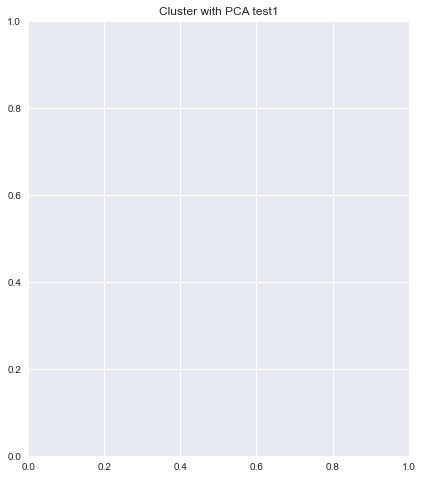

In [22]:
#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=7, random_state=2).fit_predict(pcaDataScaled)
#km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster with PCA test1')

plt.scatter( pcaDataScaled[:,0], pcaDataScaled[:,1], c=km_neat, cmap=cmap)

In [15]:
pcaDataScaled

,PC1,PC2,PC3,PC4,PC5
0,-1.363636,2.180521,-1.531845,-1.340306,-0.591994
1,-0.595056,2.012464,-0.682426,-2.064739,0.217552
2,-1.602702,2.482659,-0.146064,-1.816965,1.021228
3,2.487065,3.285520,-1.558540,3.168726,4.723002
4,1.371485,3.051876,0.937666,-0.158594,1.288495
...,...,...,...,...,...
392,-0.217963,-1.362643,0.786782,1.524421,0.617900
393,-0.834803,-0.857448,2.640301,1.455163,0.970612
394,-0.231996,-1.738532,0.949006,0.767977,0.704269
395,-0.109903,-1.693123,0.741318,-0.447795,0.598457
